## Latin-Hypercube Sampling

This code follows the code in the PSF-licensed code of ``scipy.optimize``

See also: https://en.wikipedia.org/wiki/Latin_hypercube_sampling

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np, random

In [2]:
def generate(Npop, Nparam):
    segsize = 1/Npop

    population_shape = (Npop, Nparam)
    # Each entry in a1 is a random number between zero and 1/Npop;
    # this is the random location of the point within the grid cell
    a1 = segsize * np.random.random(population_shape)
    # Each entry in a2 is a shift amount, the same amount in each parameter
    a2 = np.linspace(0., 1., Npop, endpoint=False)[:, np.newaxis]
    # samples puts the data points along the main-diagonal of the parameter space
    # see the figure below for samples
    samples = a1 + a2

    # Initialize population of candidate solutions by permutation of the
    # random samples in each variable, one at a time
    population = np.zeros_like(samples)
    for j in range(Nparam):
        order = random.sample(range(Npop),k=Npop)
        population[:, j] = samples[order, j]
    return population, samples

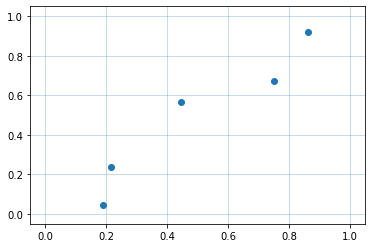

In [3]:
# Here are the samples that we generated
Npop = 5
Nparam = 2
population, samples = generate(Npop, Nparam)
fig,ax = plt.subplots(1,1)
for _x in np.linspace(0,1,Npop+1):
    ax.axhline(_x,dashes=[2,2],lw=0.5)
    ax.axvline(_x,dashes=[2,2],lw=0.5)
plt.plot(samples[:,0],samples[:,1],'o')
plt.show();

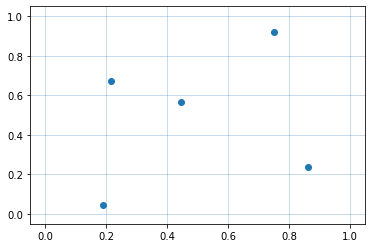

In [4]:
# Plot our permuted LHS samples and the grid lines to confirm they are all distributed
fig,ax = plt.subplots(1,1)
for _x in np.linspace(0,1,Npop+1):
    ax.axhline(_x,dashes=[2,2],lw=0.5)
    ax.axvline(_x,dashes=[2,2],lw=0.5)
ax.plot(population[:,0],population[:,1],'o')
plt.show()

**N.B.**: each column and row receives one sample, randomly located within the grid cell.  The randomization of index randomly moves the boxes in each row and column to a new location, ensuring good coverage

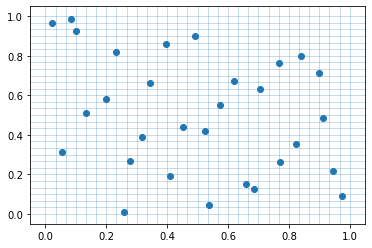

In [5]:
# And now, with a few more samples
Npop = 30
Nparam = 2
population, samples = generate(Npop, Nparam)
# Plot our LHS samples and the grid lines to confirm they are all distributed
fig,ax = plt.subplots(1,1)
for _x in np.linspace(0,1,Npop+1):
    ax.axhline(_x,dashes=[2,2],lw=0.5)
    ax.axvline(_x,dashes=[2,2],lw=0.5)
ax.plot(population[:,0],population[:,1],'o')
plt.show()

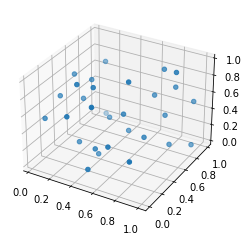

In [6]:
# And now, with again a few more samples, this time in three dimensions
Npop = 30
Nparam = 3
population, samples = generate(Npop, Nparam)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(population[:,0],population[:,1],population[:,2])
plt.show()

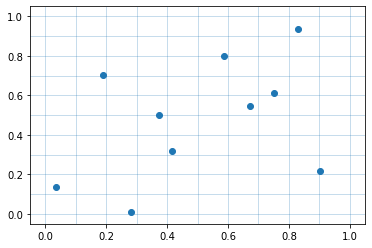

In [7]:
# And now with the C++ code...
# 
# Plot our permuted LHS samples and the grid lines to confirm they are all distributed
import PyCEGO
Npop = 10
Nparam = 3
population = PyCEGO.LHS_samples(Npop, Nparam)
fig,ax = plt.subplots(1,1)
for _x in np.linspace(0,1,Npop+1):
    ax.axhline(_x,dashes=[2,2],lw=0.5)
    ax.axvline(_x,dashes=[2,2],lw=0.5)
ax.plot(population[:,0],population[:,1],'o')
plt.show()